# Hyperparameter Tuning & Error Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
data_housing = pd.read_csv('housing (1).csv')
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Split the data_housing

In [3]:
X = data_housing.drop('median_house_value', axis = 1)
y = data_housing['median_house_value']

X.shape, y.shape

((20640, 9), (20640,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4128, 9), (16512, 9), (4128,), (16512,))

## Preprocessing pipeline

In [5]:
data_housing_num = X_train.select_dtypes([np.number]).columns
data_housing_cat = X_train.select_dtypes(['object']).columns


data_housing_cat, data_housing_num

(Index(['ocean_proximity'], dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income'],
       dtype='object'))

In [6]:
num_imputer = SimpleImputer(strategy='median')
num_scaler = StandardScaler()

cat_imputer = SimpleImputer(strategy="most_frequent")
cat_encoder = OneHotEncoder(handle_unknown='ignore')

In [7]:
num_pipline = Pipeline(steps = [
    ('num_imputer' , num_imputer),
    ('num_scaler', num_scaler)
])

cat_pipeline = Pipeline(steps = [
    ('cat_imputer', cat_imputer),
    ('cat_encoder', cat_encoder)
])

In [8]:
preprocessor = ColumnTransformer(transformers=[
    ('num_pipline', num_pipline, data_housing_num),
    ('cat_pipeline', cat_pipeline, data_housing_cat)
])

## Model 

In [9]:
ridge_model = Ridge()

## Full pipeline

In [10]:
full_pipeline = Pipeline(steps = [
    ('preprocessor' , preprocessor),
    ('ridge_model' , ridge_model)
])

## Train

In [11]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('ridge_model', Ridge())])

## Hyperparameter Tuning

In [12]:
param_grid = [{'ridge_model__alpha': [0.01, 0.1, 1, 10, 100, 1000] }]

In [13]:
grid_search  = GridSearchCV( full_pipeline,
                           param_grid,
                           cv = 5,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score= True)

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('cat_encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['ocean_proximity'], dtype='object'))])),
                                       ('ridge_model', Ridge())]),
             param_grid=[{'ridge_model__alpha': [0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [15]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('ridge_model', Ridge(alpha=100))])

In [16]:
grid_search.best_score_

-72479.10445007944

In [17]:
grid_search.cv_results_

{'mean_fit_time': array([0.01314836, 0.01294489, 0.00953488, 0.01406727, 0.01279984,
        0.01440749]),
 'std_fit_time': array([0.00337127, 0.00225356, 0.00081632, 0.00248728, 0.00066845,
        0.00301826]),
 'mean_score_time': array([0.00481396, 0.00434613, 0.00441947, 0.00639772, 0.00554838,
        0.0055994 ]),
 'std_score_time': array([0.00036606, 0.00036839, 0.00089791, 0.00257911, 0.00130784,
        0.00105232]),
 'param_ridge_model__alpha': masked_array(data=[0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ridge_model__alpha': 0.01},
  {'ridge_model__alpha': 0.1},
  {'ridge_model__alpha': 1},
  {'ridge_model__alpha': 10},
  {'ridge_model__alpha': 100},
  {'ridge_model__alpha': 1000}],
 'split0_test_score': array([-74413.51360086, -74412.73989543, -74405.31655953, -74353.85260935,
        -74457.8763454 , -78342.89491894]),
 'split1_test_score': array([-70794.7481

## CONVERT TO RMSE
1. grid_search.cv_results_["mean_train_score"]
2. grid_search.cv_results_["mean_test_score"]
3. grid_search.cv_results_["param_ridge_model__alpha"]


In [18]:
train_rmse = - grid_search.cv_results_['mean_train_score']
val_rmse = -grid_search.cv_results_['mean_test_score']
alphas = grid_search.cv_results_['param_ridge_model__alpha'].data.astype(float)

In [19]:
grid_result = pd.DataFrame({'train_rmse': train_rmse, 
                            'val_rmse':val_rmse,
                            'alphas':alphas})
grid_result['alphas'].sort_values
grid_result

,train_rmse,val_rmse,alphas
0,70839.989883,72945.166190,0.01
1,70840.302509,72944.061045,0.10
2,70851.438045,72932.633940,1.00
3,70897.476347,72829.722417,10.00
4,71278.506984,72479.104450,100.00
5,76381.720205,76560.583418,1000.00


In [20]:
grid_result['train_rmse'].min(), grid_result['val_rmse'].min()

(70839.98988268028, 72479.10445007944)

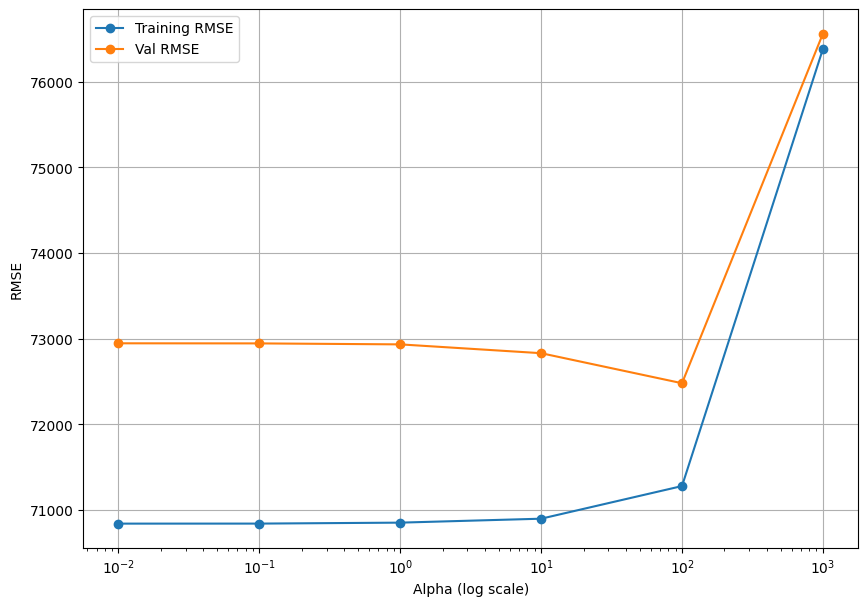

In [21]:
plt.figure(figsize=(10,7))
plt.plot(grid_result['alphas'], grid_result['train_rmse'], "o-", label = 'Training RMSE')
plt.plot(grid_result['alphas'], grid_result['val_rmse'], "o-", label = "Val RMSE")
plt.xscale('log');
plt.xlabel('Alpha (log scale)')
plt.ylabel("RMSE")
plt.legend()
plt.grid(True);

## Fit on best estimator

In [22]:
ridge_best_model = grid_search.best_estimator_

In [25]:
ridge_best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('ridge_model', Ridge(alpha=100))])

## Error analysis

In [48]:
y_train_pred = ridge_best_model.predict(X_train)

In [49]:
y_train_pred

array([ 90166.35911145, 170986.92047192, 191566.47275218, ...,
       196527.45485572, 281991.82848605, 259524.40930316])

In [50]:
residuals = y_train - y_train_pred
abs_residuals = residuals.abs()

In [51]:
top_errors = abs_residuals.sort_values(ascending=False).head(10)
top_errors

18501    535039.285911
1914     435924.681054
15360    435137.669978
4492     364385.537022
89       351746.872558
20322    337366.899760
9168     321895.355114
4644     319438.282203
10616    316065.686284
1633     315542.658518
Name: median_house_value, dtype: float64

In [52]:
X_train.loc[top_errors.index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18501,-121.59,37.19,52.0,220.0,32.0,55.0,26.0,15.0001,<1H OCEAN
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,INLAND
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN
4492,-118.22,34.06,52.0,48.0,6.0,41.0,10.0,10.2264,<1H OCEAN
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,NEAR BAY
20322,-119.14,34.23,8.0,243.0,75.0,102.0,80.0,2.5714,NEAR OCEAN
9168,-118.56,34.42,2.0,966.0,270.0,233.0,169.0,1.9667,<1H OCEAN
4644,-118.31,34.06,24.0,1336.0,453.0,1268.0,426.0,2.8202,<1H OCEAN
10616,-117.81,33.69,5.0,1256.0,256.0,880.0,288.0,2.4233,<1H OCEAN
1633,-122.22,37.88,20.0,95.0,13.0,31.0,15.0,2.4444,NEAR BAY


In [54]:
y_train_pred = pd.Series(
    y_train_pred,
    index=y_train.index
)

In [55]:
top_errors_df= pd.DataFrame({
    'y_train': y_train.loc[top_errors.index],
    'y_train_pred' : y_train_pred[top_errors.index],
    'top_errors': top_errors
})

In [56]:
to_errors_df

,y_train,y_train_pred,top_errors
18501,131300.0,666339.285911,535039.285911
1914,500001.0,64076.318946,435924.681054
15360,134400.0,-300737.669978,435137.669978
4492,112500.0,476885.537022,364385.537022
89,500001.0,148254.127442,351746.872558
20322,500001.0,162634.100240,337366.899760
9168,450000.0,128104.644886,321895.355114
4644,500001.0,180562.717797,319438.282203
10616,450000.0,133934.313716,316065.686284
1633,475000.0,159457.341482,315542.658518
